In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/HousePrice_M.csv")
print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


In [14]:
df.fillna(df.bedrooms.median(), inplace = True)
print(df)


   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


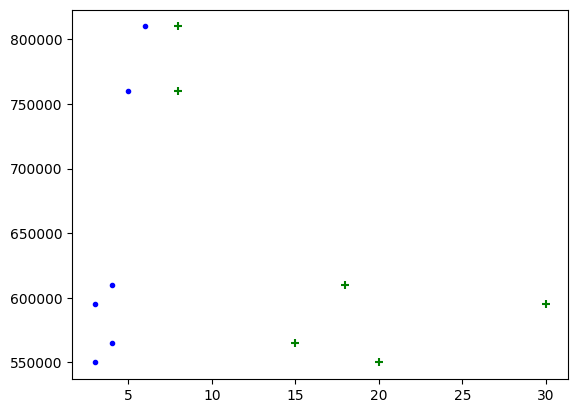

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.age, df.price,c='g', marker = "+")
ax1.scatter(df.bedrooms, df.price, c='b',marker='.')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values
print(X)
print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.0   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
[550000 565000 610000 595000 760000 810000]


In [18]:
lr = LinearRegression()


In [19]:
lr.fit(X,y)

LinearRegression()

In [20]:
p1 = lr.predict([[3000,40,3]])
p2 = lr.predict([[2500,5,4]])
print(p1)
print(p2)

[1483370.37708347]
[605496.6354759]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [22]:
df_test = pd.read_csv("/content/HousePrice_M1.csv")

In [23]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1].values
print(X_test)
print(y_test)

   area  bedrooms  age
0  2500         3   20
1  3500         4   10
2  3600         3   30
3  4100         6    5
[550000 565000 595000 910000]


In [24]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred) #predict value
print(y_test) #real value

[507011.3887819  674779.8898883  597962.89583192 804953.70475263]
[550000 565000 595000 910000]


In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error :",mae)
print("mean squared error :",mse)
print("Root mean squared error : ",rmse)


Mean Absolute Error : 65194.423046423646
mean squared error : 6235786953.814512
Root mean squared error :  78966.99914403808


In [26]:
print(y_test)
print(y_pred)

[550000 565000 595000 910000]
[507011.3887819  674779.8898883  597962.89583192 804953.70475263]


In [27]:
#validate predition
m = lr.coef_
b = lr.intercept_
print(m)
print(b)
y_cal = m * 3000 + b
print(y_cal)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540396
[  557510.32769181 70387963.23568282 -9473830.72403351]


In [28]:
from sklearn.metrics import r2_score
s = r2_score(y_test,y_pred)
print(s)

0.7157476032449226
